# Inspired by PCA analysis and dimension reduction in
# Do Pokemon Really Need All 6 Stats?
# https://www.youtube.com/watch?v=UhHSX5CahkU&t=513s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import pokemon_stats as ps
import pokemon_stats.viz as viz
import pokemon_stats.pca_utils as pcu

import plotly.express as px

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('../Input_data/pokedex_all_gen.csv')
df.head(13)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
5,5,Charmeleon,Fire,405,58,64,58,80,65,80
6,6,Charizard,Fire Flying,534,78,84,78,109,85,100
7,6,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,6,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
9,7,Squirtle,Water,314,44,48,65,50,64,43


# keep only pokemon stats as numeric columns for PCA

In [3]:
# we do not keep the Total Stats since that number is redudant for PCA
# stats_cols = df.columns.to_list()[-6:]
df.set_index('Name', inplace=True)
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[stats_cols]
X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
Venusaur Mega Venusaur,80,100,123,122,120,80
Charmander,39,52,43,60,50,65
...,...,...,...,...,...,...
Iron Crown,90,72,100,122,108,98
Terapagos Normal Form,90,65,85,65,85,60
Terapagos Terastal Form,95,95,110,105,110,85


# Visualize distributions of numeric cols

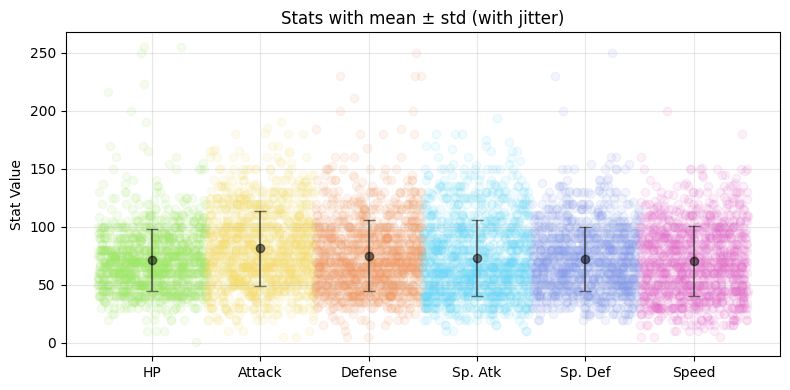

In [4]:
viz.scatter_stats(X, color_by='stats')

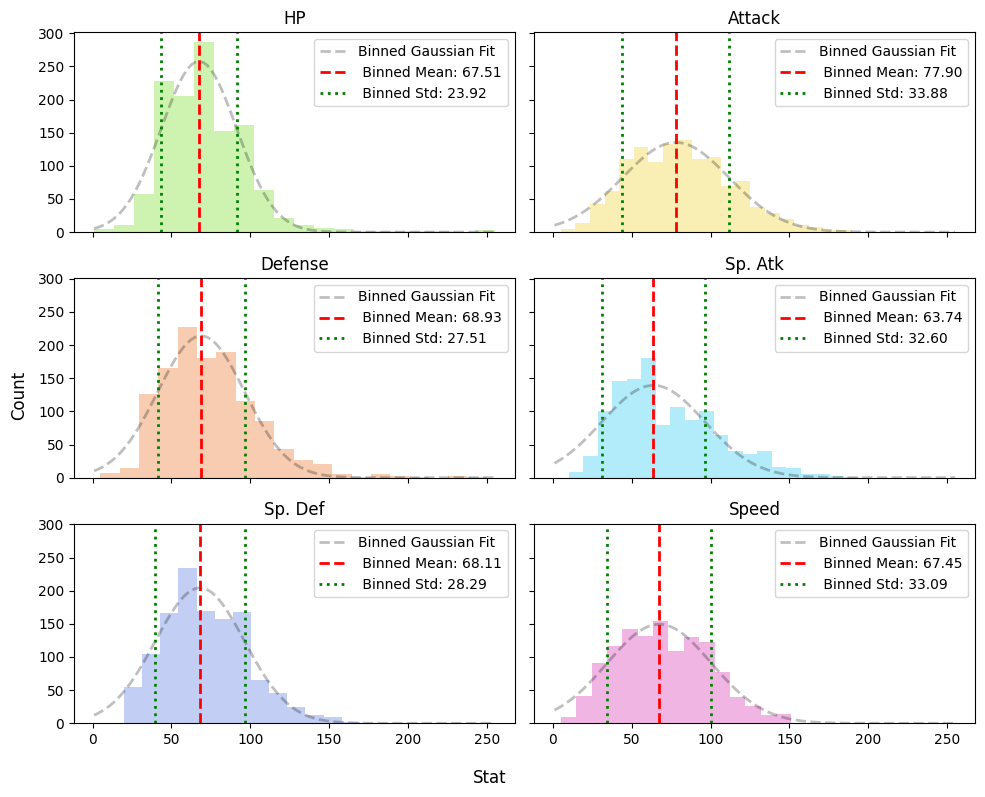

In [145]:
viz.hist_stats(X, color_by='stats')

# Standarize the data so mean = 0 and var = 1

In [146]:
X_standard = pcu.standardize(X)
X_standard

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,-0.977750,-1.006909,-0.849190,-0.254657,-0.273766,-0.833019
Ivysaur,-0.419790,-0.601480,-0.393329,0.202525,0.269517,-0.335461
Venusaur,0.324157,0.022258,0.257901,0.812102,0.993894,0.327950
Venusaur Mega Venusaur,0.324157,0.583622,1.560361,1.482636,1.718270,0.327950
Charmander,-1.200934,-0.913349,-1.044559,-0.407051,-0.817048,-0.169608
...,...,...,...,...,...,...
Iron Crown,0.696130,-0.289611,0.811447,1.482636,1.283644,0.925020
Terapagos Normal Form,0.696130,-0.507919,0.323024,-0.254657,0.450611,-0.335461
Terapagos Terastal Form,0.882117,0.427688,1.137062,0.964496,1.356082,0.493803


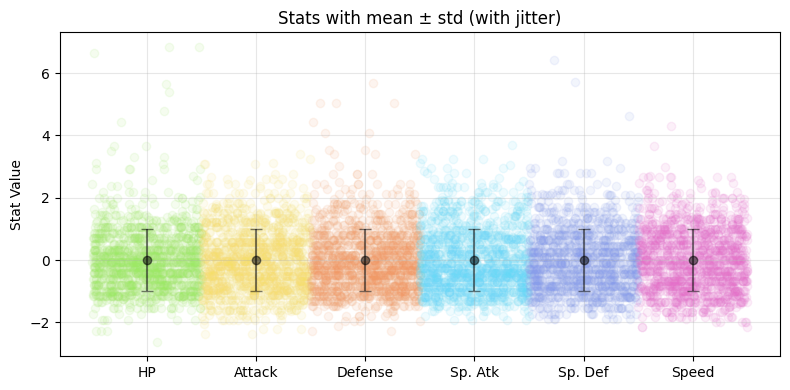

In [147]:
viz.scatter_stats(X_standard, color_by='stats')

/mnt/c/Users/jcv5ff/My Drive/Programming/Python/pokemon-stats/src/pokemon_stats/viz.py:94: OptimizeWarning:

Covariance of the parameters could not be estimated



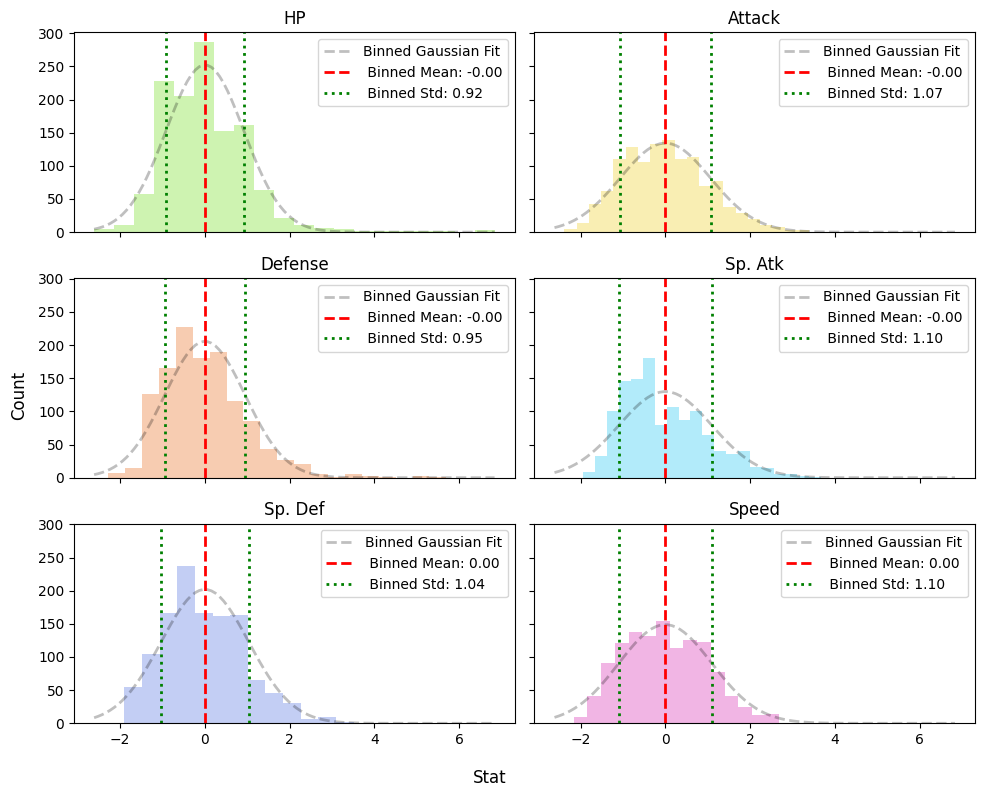

In [148]:
viz.hist_stats(X_standard, color_by='stats')

# do the PCA fit

In [149]:
X_pca, pca = pcu.pca(X_standard)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6
Name,,,,,,
Bulbasaur,-1.667552,-0.009134,-0.767622,0.057528,0.259917,-0.289447
Ivysaur,-0.485119,0.064793,-0.785405,0.093646,0.108885,-0.204629
Venusaur,1.144803,0.138220,-0.755176,0.103783,-0.066508,-0.108665
Venusaur Mega Venusaur,2.519029,-0.512658,-1.072197,-0.544287,0.282299,0.069008
Charmander,-1.902704,0.652201,-0.318952,-0.240846,0.148994,-0.044639
...,...,...,...,...,...,...
Iron Crown,1.984259,0.371871,-1.221502,0.130421,-0.193640,0.553522
Terapagos Normal Form,0.185141,-0.682765,-0.317398,0.549988,-0.534445,0.195072
Terapagos Terastal Form,2.179346,-0.336920,-0.578949,0.012451,-0.199748,0.169432


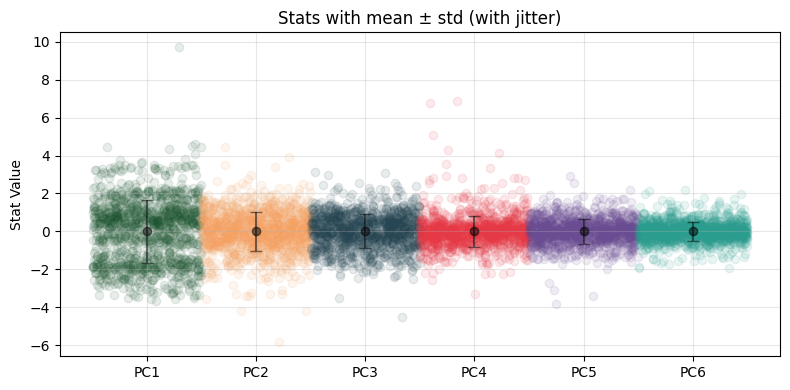

In [150]:
viz.scatter_stats(X_pca, color_by='pca')

We can see from the scatter for each PC component that the first one captures the most variance and as we go up in the list, data is better approximated by a guassian with smaller std dev

/mnt/c/Users/jcv5ff/My Drive/Programming/Python/pokemon-stats/src/pokemon_stats/viz.py:94: OptimizeWarning:

Covariance of the parameters could not be estimated



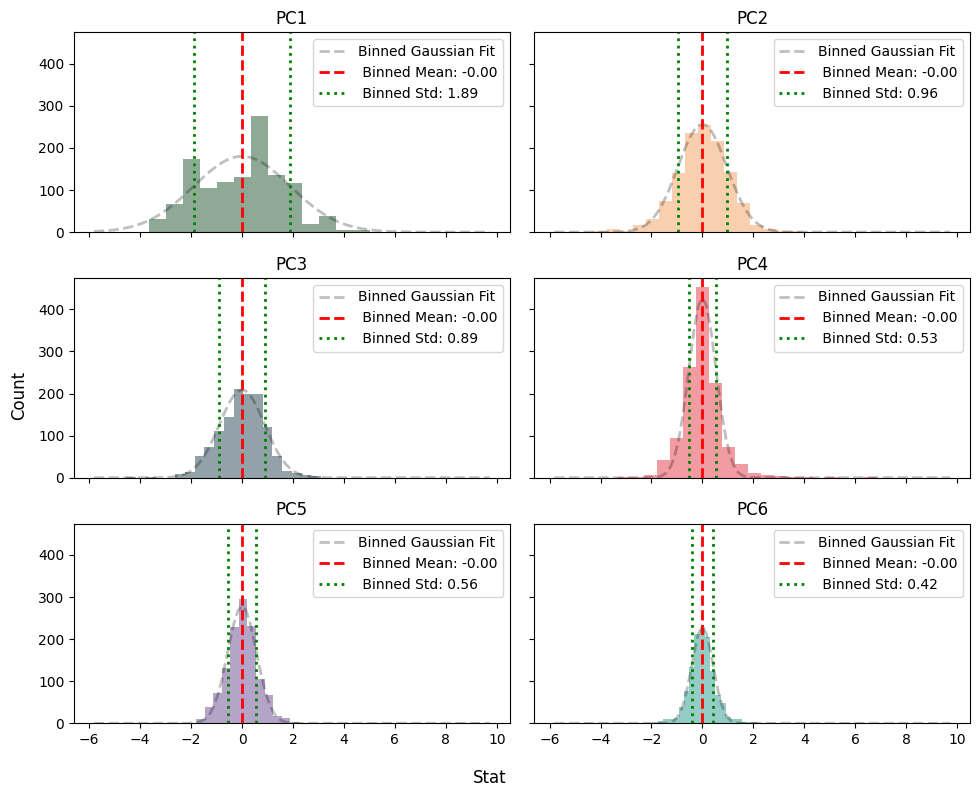

In [151]:
viz.hist_stats(X_pca, color_by='pca')

We can see from the histograms for each PC component that the first one captures the most variance and as we go up in the list, the data is better approximated by a guassian with smaller std dev

# look at fraction of variance explained by cumulative sum of components

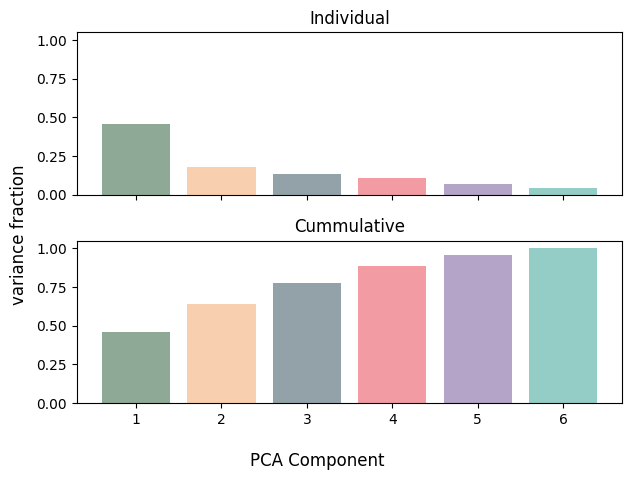

In [160]:
pcu.pca_var_bar2(pca)

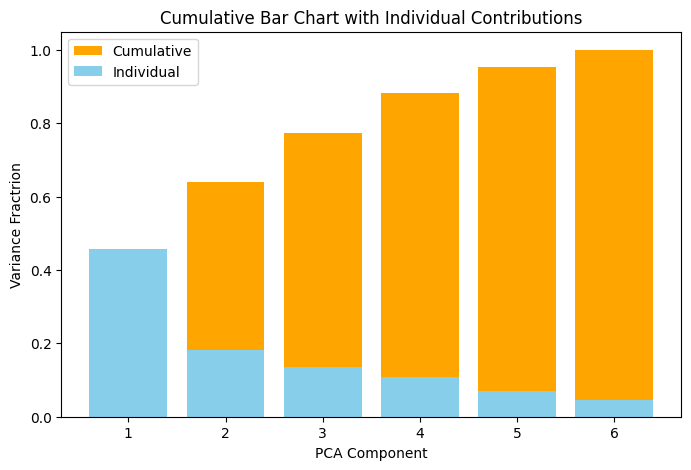

In [162]:
pcu.pca_var_bar(pca)

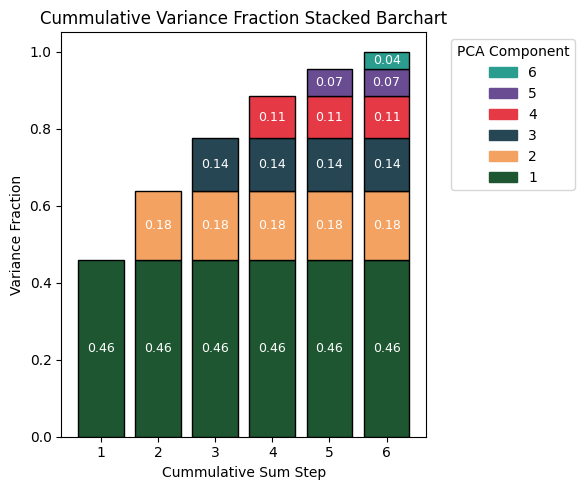

In [164]:
pcu.bar_bar(pca)

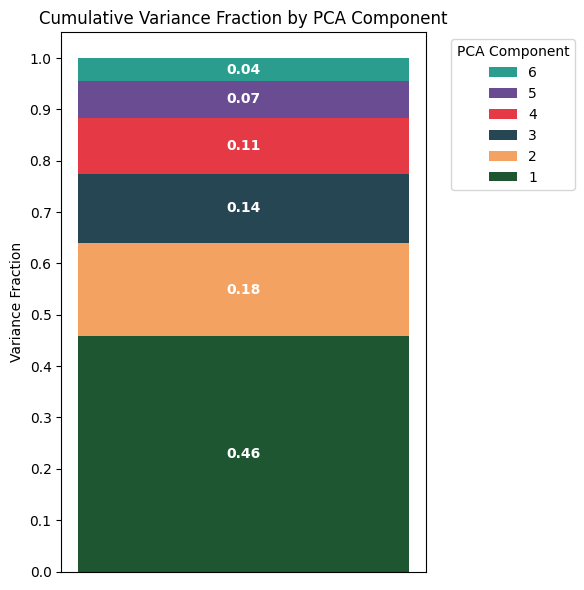

In [165]:
pcu.pca_var_stackedbar(pca)

# visualize the PCA components in terms of original Stats

In [36]:
# weights: how each original feature contributes to each PC
weights = pcu.pca_components(pca)
weights

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.412886,0.435270,0.394930,0.428920,0.452659,0.308583
PC2,-0.136652,-0.003791,-0.571831,0.334638,-0.177185,0.714803
PC3,0.274954,0.643402,0.009926,-0.426775,-0.559053,0.125136
PC4,0.792612,-0.223251,-0.448073,0.162442,-0.066361,-0.300607
PC5,-0.260161,0.311837,0.001163,0.681927,-0.393466,-0.463932
PC6,0.198330,-0.499476,0.562290,0.174630,-0.540320,0.269401


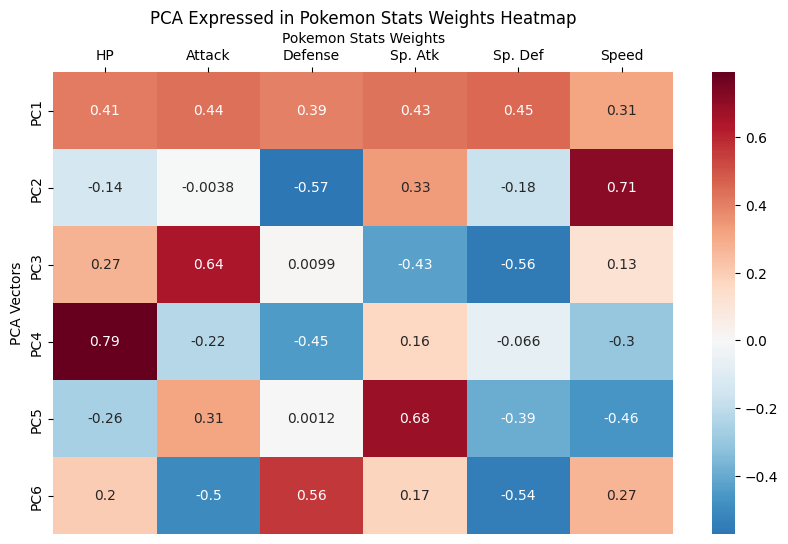

In [38]:
viz.heatmap(weights)

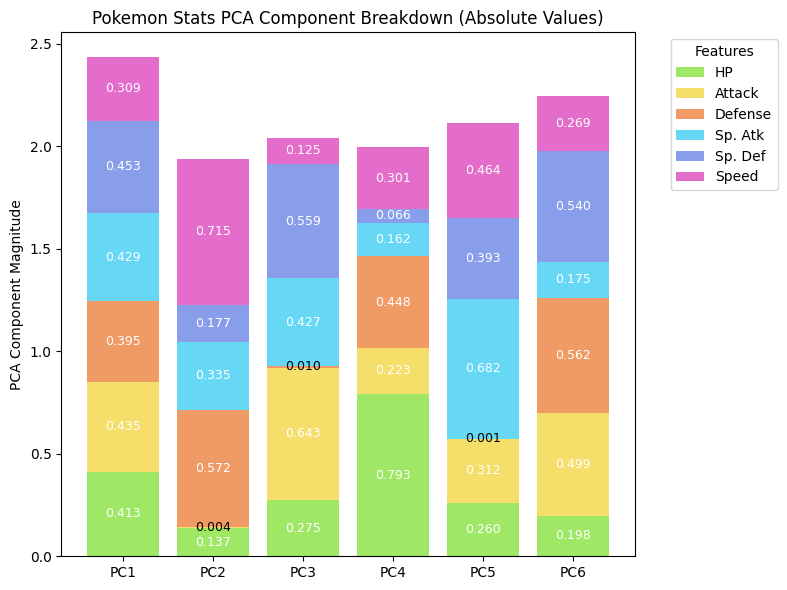

In [167]:
pcu.bar_abs_pca_components(pca)

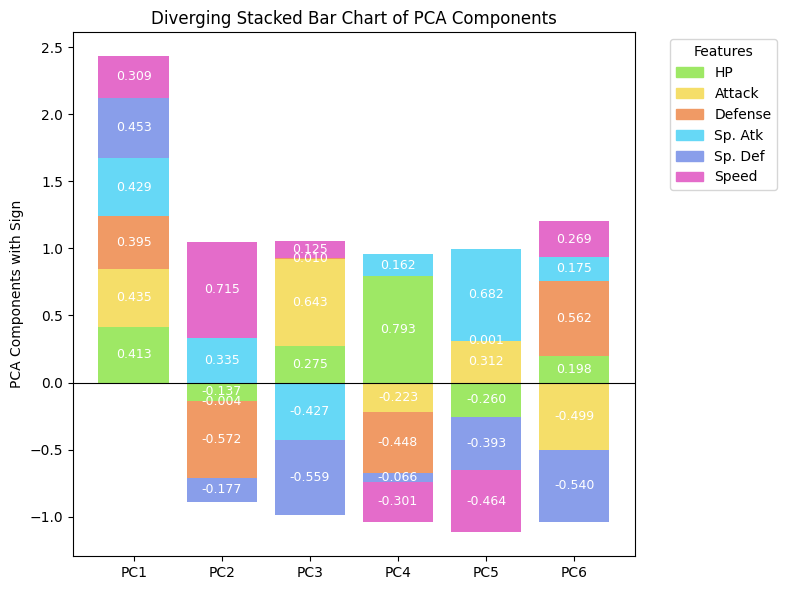

In [169]:
pcu.bar_sign_pca_components(pca)

It its clear to see PC1 is almost an equal mix of each stat, which is basically the total stats of a pokemon. So the total stats are a good predictor of a pokemons value. PC2 is high speed and good sp atk, with low defenses signaling an aggressive pokemon. PC3 has high regular attack and super low defenses, showing yet another aggressive trait. PC4 represents high HP pokemon also known as tanks

# Visualize one PC component at a time

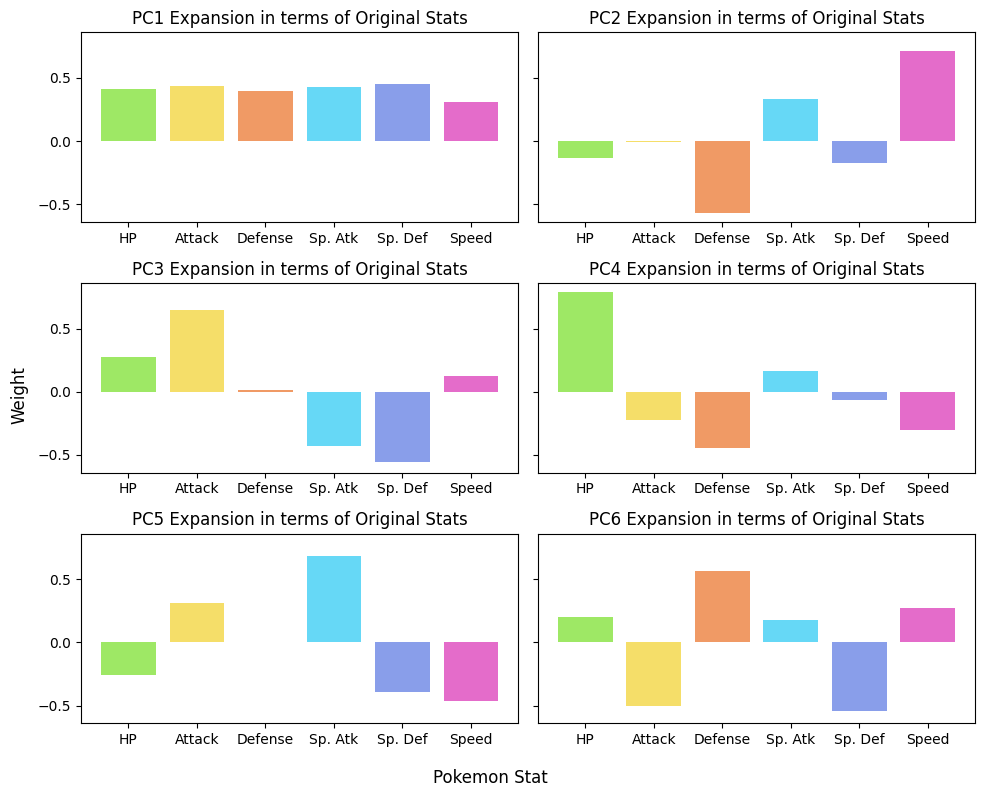

In [173]:
viz.barcharts(weights)

# visualize after sorting by biggest components

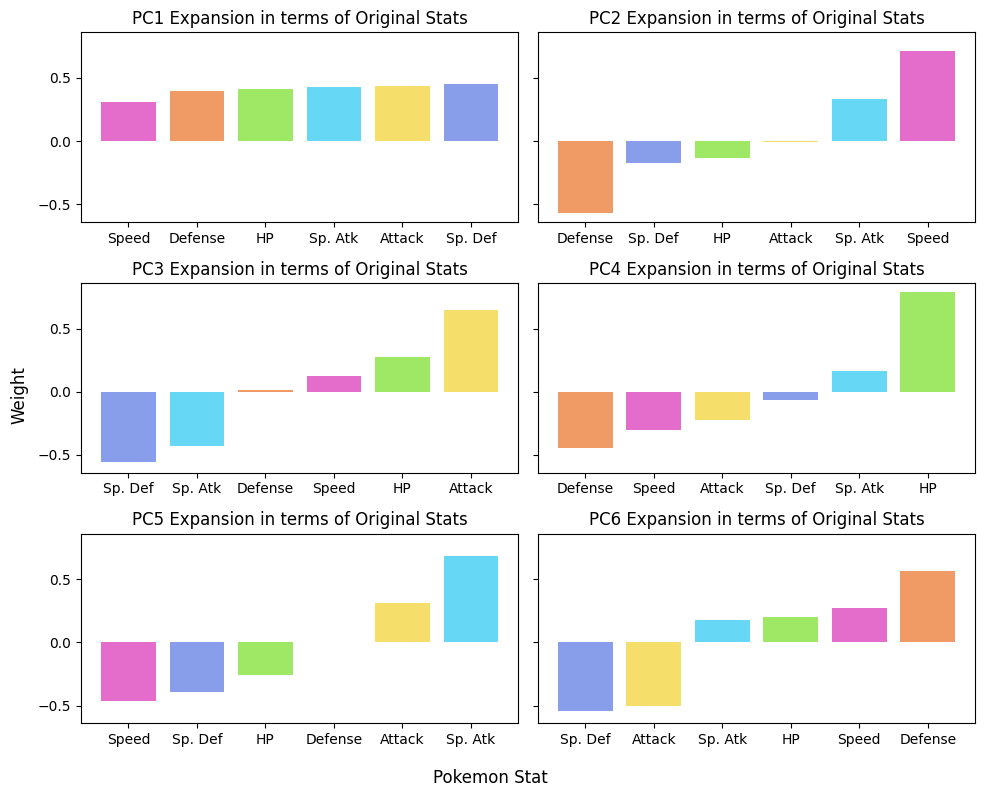

In [174]:
viz.barcharts(weights, sort=True)

# compare PCA 1 and PCA 2 values

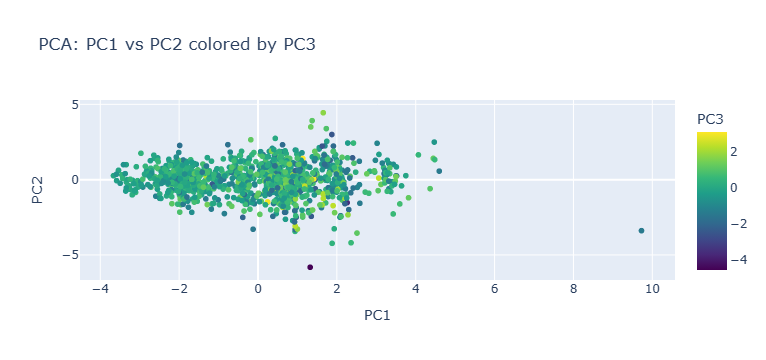

In [63]:
fig = px.scatter(
    X_pca,
    x='PC1',
    y='PC2',
    color='PC3',             # Color points by PC3
    hover_data=[X_pca.index],  # show index on hover
    title='PCA: PC1 vs PC2 colored by PC3',
    color_continuous_scale='Viridis'  # optional color scale
)

fig.show()

# interactive scatter chart choosing from different PCA components 

In [64]:
def interactive_pca_plot(x_axis='PC1', y_axis='PC2', color='PC3'):
    fig = px.scatter(
        X_pca,
        x=x_axis,
        y=y_axis,
        color=color,
        hover_data=[X_pca.index],
        color_continuous_scale='Viridis',  # optional color scale
        title=f'PCA: {x_axis} vs {y_axis} colored by {color}'
    )
    fig.show()

In [65]:
# Assume df_pca has columns PC1, PC2, ..., PC6
pc_cols = [f'PC{i}' for i in range(1, 7)]

# Create interactive widgets
interact(
    interactive_pca_plot,
    x_axis=pc_cols,
    y_axis=pc_cols,
    color=pc_cols
)

NameError: name 'interact' is not defined

# Fancier Version of PC scatter chart

In [14]:
# Function to find a free port
def find_free_port():
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.bind(('', 0))  # bind to a free port assigned by the OS
    port = s.getsockname()[1]
    s.close()
    return port

In [15]:
# Assume df_pca is your PCA DataFrame with columns PC1, PC2, ..., PC6
pc_cols = [f'PC{i}' for i in range(1, 7)]
hover_labels = X_pca.index  # or df['Name'] if you have labels

color_options = pc_cols  # or include categorical columns

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H2("Interactive PCA Explorer"),
    
    html.Div([
        html.Label("X-axis:"),
        dcc.Dropdown(id='x-axis', options=[{'label': c, 'value': c} for c in pc_cols], value='PC1')
    ], style={'width':'30%', 'display':'inline-block'}),
    
    html.Div([
        html.Label("Y-axis:"),
        dcc.Dropdown(id='y-axis', options=[{'label': c, 'value': c} for c in pc_cols], value='PC2')
    ], style={'width':'30%', 'display':'inline-block', 'marginLeft':'20px'}),
    
    html.Div([
        html.Label("Color:"),
        dcc.Dropdown(id='color', options=[{'label': c, 'value': c} for c in color_options], value='PC3')
    ], style={'width':'30%', 'display':'inline-block', 'marginLeft':'20px'}),
    
    dcc.Graph(id='pca-scatter', style={'height': '600px'})
])

# Callback to update scatter plot
@app.callback(
    Output('pca-scatter', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('color', 'value')]
)
def update_scatter(x_axis, y_axis, color):
    fig = px.scatter(
        X_pca,
        x=x_axis,
        y=y_axis,
        color=color,
        hover_data=[hover_labels],
        color_continuous_scale='Viridis',
        title=f'PCA: {x_axis} vs {y_axis} colored by {color}'
    )
    fig.update_layout(transition_duration=300)
    return fig

# Run app in notebook with a free port
free_port = find_free_port()
app.run(mode='inline', port=free_port)

NameError: name 'Dash' is not defined